In [1]:
from backtestlib import *
from datetime import datetime,date
import pandas as pd
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
start_date_true= '2017-01-01' #期望开始时间
end_date= '2025-02-28'
# end_date = '2024-12-31'
# end_date = '2024-11-20'
transaction_fee_rate=0.0003 # 交易费率为0.03%
index_code = '000300.SH' # 指数代码
def int_index_to_datetime(df):
    df.index = pd.to_datetime(df.index, format='%Y%m%d')
    return df

def adj_date(df, start_date=start_date_true, end_date=end_date):
    try:
        return df[(df.index>=start_date) & (df.index<=end_date)]
    except:
        raise Exception('Date must be integer and set as index.')

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2024 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [2]:
df_position = pd.read_excel(r'C:\QPS\df_position.xlsx')
df_position.drop(columns=['Unnamed: 0'], inplace=True)
df_position['Date'] = pd.to_datetime(df_position['Date'])  # 确保是 datetime 类型
# df_position['Date'] = df_position['Date'].dt.to_period('M').dt.to_timestamp()
for i in range(len(df_position)):
    if df_position.loc[i, 'return'] >= 0:
        df_position.loc[i, 'Position'] = 1
    if df_position.loc[i, 'return'] < 0:
        df_position.loc[i, 'Position'] = 0
df_longshort = df_position.set_index('Date').copy()

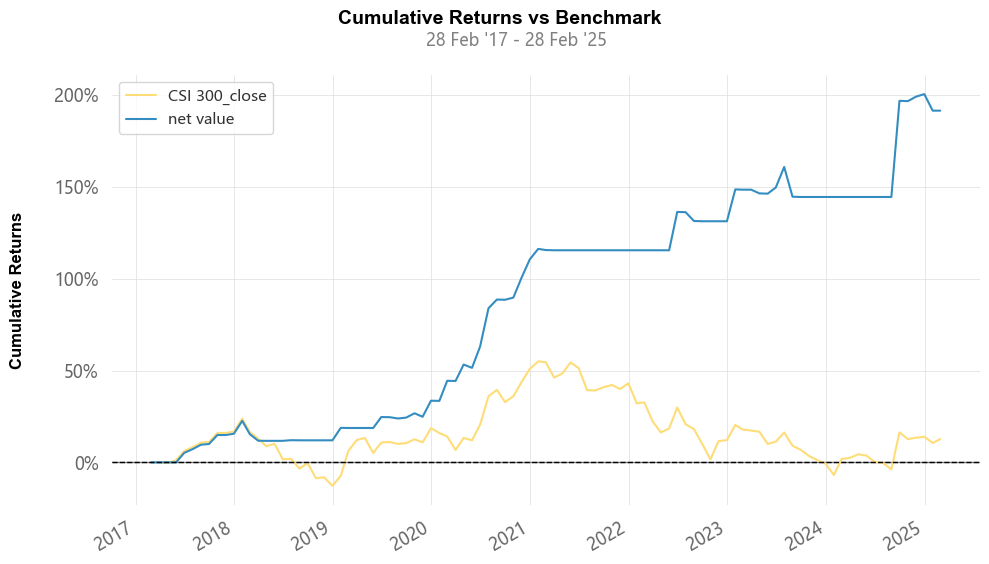

,2017,2018,2019,2020,2021,2022,2023,2024,2025,Full Period
Annualized Return,0.126719,-0.023432,0.142075,0.408358,0.017652,0.054875,0.042810,0.167852,-0.239381,0.096686
Annualized Volatility,0.300214,0.430555,0.453220,0.686721,0.125809,0.462182,0.511570,0.977157,0.336131,0.562683
Information Ratio,-0.187253,0.558845,-0.240845,0.521812,0.177351,0.451125,0.829332,0.134706,-0.707107,0.246357
Win Rate,0.750000,0.333333,0.555556,0.666667,0.333333,0.250000,0.375000,0.750000,0.000000,0.527273
Maximum Drawdown Rate,-0.000154,-0.088809,-0.014943,-0.011643,-0.003439,-0.021438,-0.062676,-0.000600,0.000000,-0.088809
Excess Net Value,-0.011516,0.222161,-0.168168,0.304394,0.075449,0.289700,0.170915,0.082255,-0.018544,1.789214
Annualized Excess Return,-0.008279,0.198377,-0.115345,0.167489,0.049595,0.230287,0.137350,0.041090,-0.159462,0.072986
Excess Drawdown Level,-0.015446,-0.031297,-0.202402,-0.017327,-0.054890,-0.102490,-0.002731,-0.116088,-0.019116,-0.204683
Return Volatility Ratio,0.422095,-0.054422,0.313479,0.594650,0.140306,0.118730,0.083684,0.171776,-0.712164,0.171831
Return Drawdown Ratio,-820.767941,0.263843,-9.507549,-35.073407,-5.132738,-2.559759,-0.683041,-279.754100,NaN,-1.088693


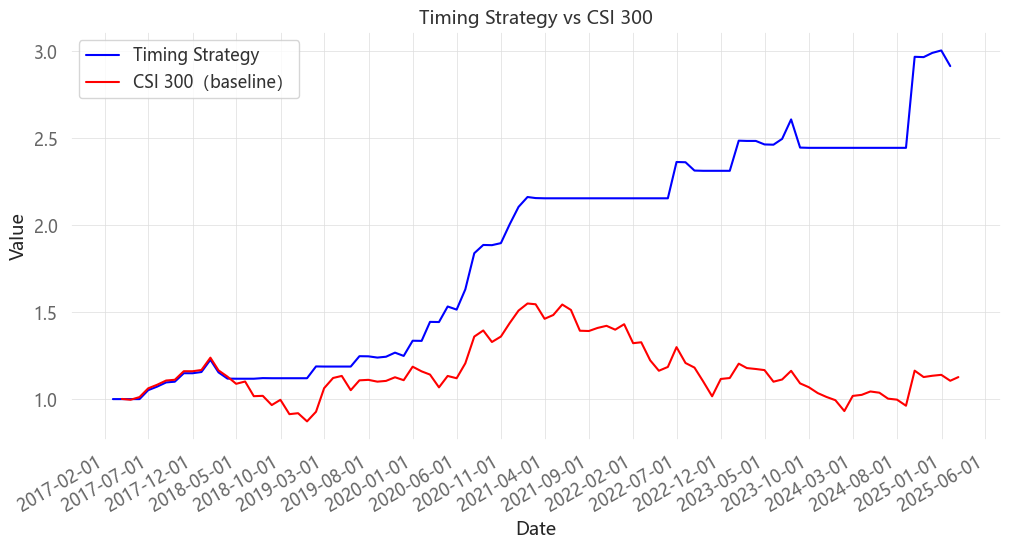

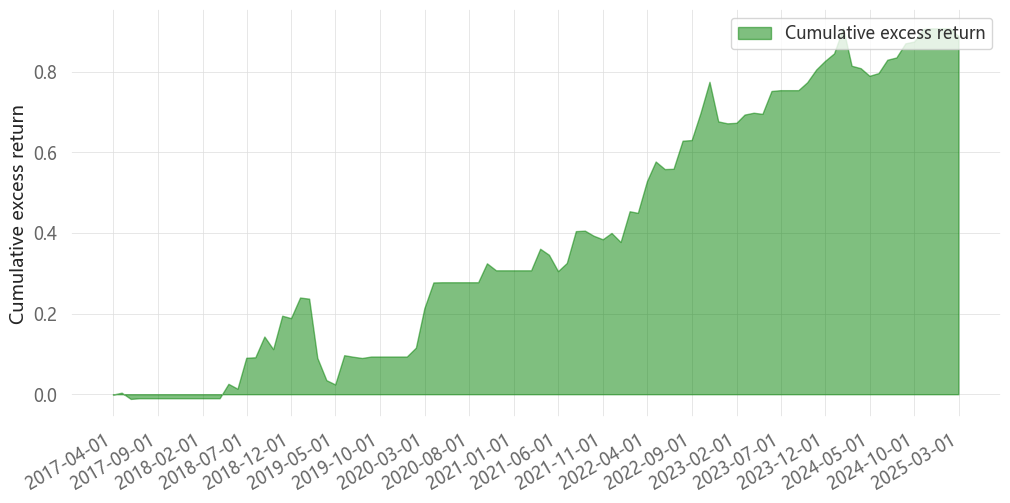

In [4]:
df_longshort['transaction_fee']=0.0 #初始化交易费用为0
# 计算仓位变动
for i in range(1, len(df_longshort)):
    previous_position = df_longshort.iloc[i-1]['Position']
    current_position = df_longshort.iloc[i]['Position']
    
    # 计算交易费用
    if previous_position != current_position:
        df_longshort['transaction_fee'].iloc[i] = transaction_fee_rate  * abs(current_position - previous_position)
        # df_longshort['transaction_fee'].iloc[i] = transaction_fee_rate
    else:
        df_longshort['transaction_fee'].iloc[i] = 0
    
strategy_longshort = backtest_longshort(start_date='2017-02-01', end_date=end_date,df_timing = df_longshort, index_code=index_code,positive = 0)
# strategy_longshort = backtest_longshort(start_date='2022-01-01', end_date=end_date,df_timing = df_longshort, index_code=index_code,positive = 0)
# 策略收益率和基准收益率
strategy_returns = strategy_longshort.df_merged['net value'].pct_change(1)
benchmark_returns = strategy_longshort.df_merged[f'{strategy_longshort.get_index_name(strategy_longshort.index_code)}_close'].pct_change(1)
risk_free_rate = 0.02  # 假设年化无风险利率为2%

# 调用analyze_performance方法来分析表现
performance_metrics = strategy_longshort.analyze_performance(strategy_returns, benchmark_returns, risk_free_rate)
result = strategy_longshort.calculate_performance()
result